In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('MIKRO2018.csv')

C:\Users\angel\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head(3)

,No Kontrak,Cabang,Area,Regional,Nama Kelompok,Nama Debitur,Produk Penyertaan,Tenor,Status Perkawinan,Kelurahan Debitur,...,Nama Surveyor,Aging Pastdue,Keterangan Past Due,OSP,Pendidikan Debitur,Jenis Kelamin,Bagi Hasil,Penggunaan Dana Investasi,Angsuran Tempat lain,Status Kontrak
0,005.0117.0073,CIKUPA,AREA 1D - BANTEN,REGIONAL 1 - JBB,KP KUTRUK,DENSIH WINENGSIH,MIKRO,40,MARRIED,TAPOS,...,BC 3 Nia,675,WO,"2,205,811",SMP,PEREMPUAN,75000,MENAMBAH MODAL USAHA,YES,WO
1,005.0117.0113,CIKUPA,AREA 1D - BANTEN,REGIONAL 1 - JBB,KP PEUSAR 2 RO,YUNITA SARI,MIKRO,40,MARRIED,PANONGAN,...,BC 4 SILVIA,608,WO,"1,844,125",SMA,PEREMPUAN,75000,MENAMBAH MODAL USAHA,NO,WO
2,005.0118.0127,CIKUPA,AREA 1D - BANTEN,REGIONAL 1 - JBB,KP JAHA,ENDAH,MIKRO,40,MARRIED,MALANG NENGAH,...,BC 5 Laila,179,91-180 HARI,"1,546,733",SD,PEREMPUAN,85000,MENAMBAH MODAL USAHA,NO,NPL


In [5]:
data.tail(3)

,No Kontrak,Cabang,Area,Regional,Nama Kelompok,Nama Debitur,Produk Penyertaan,Tenor,Status Perkawinan,Kelurahan Debitur,...,Nama Surveyor,Aging Pastdue,Keterangan Past Due,OSP,Pendidikan Debitur,Jenis Kelamin,Bagi Hasil,Penggunaan Dana Investasi,Angsuran Tempat lain,Status Kontrak
105895,115.1218.0018,KCP TATELI,AREA 3B - KOTAMOBAGU,REGIONAL 3 - SULUTGO & MALUT,MAWAR,MERLIYANA RANDJU,MIKRO,40,MARRIED,TATELI,...,MC 2 | Nama? | Nik?,0,CURRENT,"2,420,004",SMA,PEREMPUAN,88000,MENAMBAH MODAL USAHA,NO,LIVE
105896,115.1218.0019,KCP TATELI,AREA 3B - KOTAMOBAGU,REGIONAL 3 - SULUTGO & MALUT,MAWAR,ELMI WALLAH,MIKRO,40,JANDA/DUDA,TATELI,...,MC 2 | Nama? | Nik?,0,CURRENT,"2,420,004",SMA,PEREMPUAN,88000,MENAMBAH MODAL USAHA,NO,LIVE
105897,115.1218.0020,KCP TATELI,AREA 3B - KOTAMOBAGU,REGIONAL 3 - SULUTGO & MALUT,MAWAR,JULANDA SELLY SIRANG,MIKRO,40,MARRIED,TATELI,...,MC 2 | Nama? | Nik?,0,CURRENT,"2,420,004",SMA,PEREMPUAN,88000,MENAMBAH MODAL USAHA,NO,LIVE


In [6]:
def convert_currency(val):
    new_val = val.replace(',','')
    return float(new_val)

data['OSP'] = data['OSP'].apply(convert_currency)

In [7]:
data['Lama Tinggal'] = data['Lama Tinggal'].str.extract('(\d+) ,0 Tahun')

In [8]:
data['Lama Usaha'] = data['Lama Usaha'].apply(lambda x: int(x.split(',')[0])*12 + int(x.split(',')[1]))

In [9]:
data.corr()

,Tenor,Nilai Funding,Lama Usaha,Aging Pastdue,OSP,Bagi Hasil
Tenor,1.000000,0.256020,0.012973,-0.209129,0.128993,0.139576
Nilai Funding,0.256020,1.000000,0.045104,-0.180793,0.711630,0.979157
Lama Usaha,0.012973,0.045104,1.000000,-0.007001,0.019920,0.042305
Aging Pastdue,-0.209129,-0.180793,-0.007001,1.000000,-0.126506,-0.182494
OSP,0.128993,0.711630,0.019920,-0.126506,1.000000,0.745615
Bagi Hasil,0.139576,0.979157,0.042305,-0.182494,0.745615,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105898 entries, 0 to 105897
Data columns (total 36 columns):
No Kontrak                   105898 non-null object
Cabang                       105898 non-null object
Area                         105898 non-null object
Regional                     105898 non-null object
Nama Kelompok                105883 non-null object
Nama Debitur                 105898 non-null object
Produk Penyertaan            105898 non-null object
Tenor                        105898 non-null int64
Status Perkawinan            105898 non-null object
Kelurahan Debitur            105898 non-null object
Kecamatan Debitur            105898 non-null object
Kota                         105898 non-null object
Kode Pos                     105898 non-null object
Status Rumah                 105898 non-null object
Lama Tinggal                 100956 non-null object
Nilai Funding                105898 non-null int64
Referensi                    105898 non-null object
Jenis U

In [11]:
data.drop(['No Kontrak', 'Keterangan Past Due', 'Nama Debitur', 'Produk Penyertaan', 'Kode Pos', 'Kode Pos.1'], axis=1, inplace=True)

In [12]:
data.isna().sum()

Cabang                          0
Area                            0
Regional                        0
Nama Kelompok                  15
Tenor                           0
Status Perkawinan               0
Kelurahan Debitur               0
Kecamatan Debitur               0
Kota                            0
Status Rumah                    0
Lama Tinggal                 4942
Nilai Funding                   0
Referensi                       0
Jenis Usaha                     0
Nama Kegiatan Usaha             0
Bentuk Usaha                    0
Lama Usaha                      0
Kelurahan Tempat Usaha          0
Kecamatan Tempat Usaha          0
Kota.1                          0
Alamat Tempat Usaha             0
Nama Surveyor                   0
Aging Pastdue                   0
OSP                             0
Pendidikan Debitur              0
Jenis Kelamin                   0
Bagi Hasil                      0
Penggunaan Dana Investasi       0
Angsuran Tempat lain            0
Status Kontrak

In [13]:
data = data.dropna()

In [14]:
print('Number of rows in the dataset:', data.shape[0])
print('Number of columns in the dataset:', data.shape[1])

Number of rows in the dataset: 100941
Number of columns in the dataset: 30


In [15]:
data.describe()

,Tenor,Nilai Funding,Lama Usaha,Aging Pastdue,OSP,Bagi Hasil
count,100941.000000,1.009410e+05,100941.000000,100941.000000,1.009410e+05,100941.000000
mean,39.814951,3.129283e+06,72.416738,10.976828,2.256870e+06,113515.301017
std,2.210913,8.600230e+05,100.155357,71.785831,1.008520e+06,28138.727919
min,5.000000,1.944440e+05,-84.000000,0.000000,-1.000000e+00,40000.000000
25%,40.000000,2.300000e+06,24.000000,0.000000,1.339968e+06,85000.000000
50%,40.000000,3.300000e+06,36.000000,0.000000,2.278540e+06,115000.000000
75%,40.000000,3.460000e+06,96.000000,0.000000,3.097617e+06,129000.000000
max,52.000000,6.650000e+06,18000.000000,983.000000,6.613250e+06,387000.000000


<function matplotlib.pyplot.show(*args, **kw)>

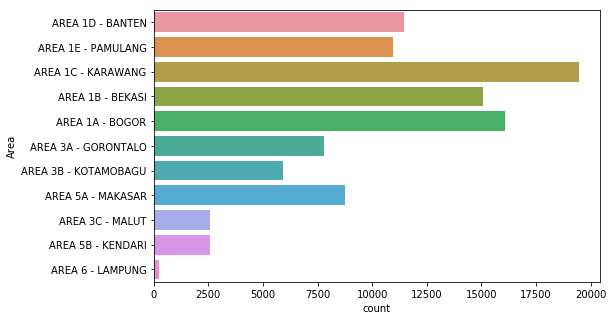

In [16]:
fig = plt.figure(figsize=(8,5))
sns.countplot(y='Area', data=data)
plt.show

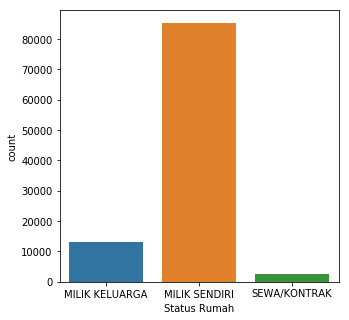

In [17]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status Rumah', data=data)
plt.show()

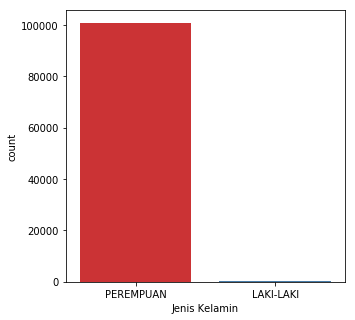

In [18]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Jenis Kelamin', data=data, palette="Set1")
plt.show()

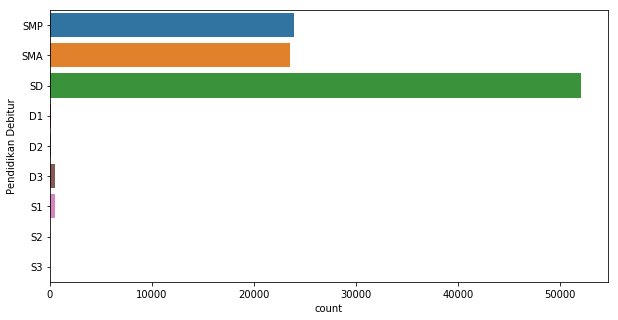

In [19]:
fig = plt.figure(figsize=(10,5))
sns.countplot (y='Pendidikan Debitur', data=data)
plt.show()

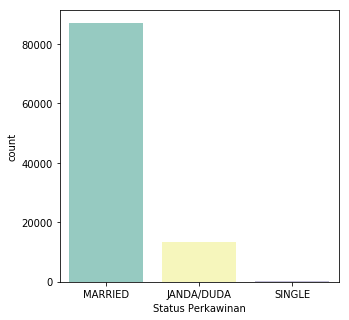

In [20]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status Perkawinan', data=data, palette="Set3")
plt.show()

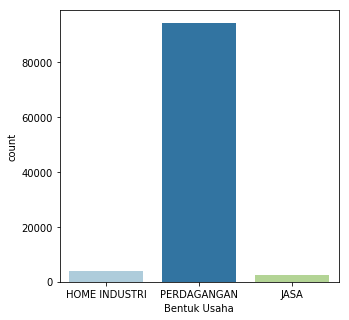

In [21]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Bentuk Usaha', data=data, palette="Paired")
plt.show()

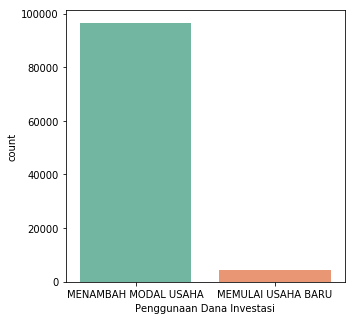

In [22]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Penggunaan Dana Investasi', data=data, palette="Set2")
plt.show()

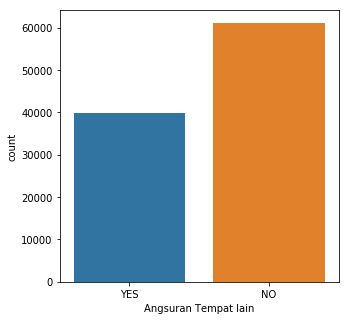

In [23]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Angsuran Tempat lain', data=data)
plt.show()

In [24]:
data['Referensi'].value_counts()

RO                   29143
MEMBER GET MEMBER    27695
PENGGEMUKAN          22290
DERET CACAH          20863
TEMAN/TETANGGA         493
BROSUR                 195
SAUDARA/KELUARGA       101
WALK-IN                100
AGEN                    43
MITRA                   16
INTERNET                 1
SPANDUK                  1
Name: Referensi, dtype: int64

In [25]:
data['Area'].value_counts()

AREA 1C - KARAWANG      19447
AREA 1A - BOGOR         16086
AREA 1B - BEKASI        15054
AREA 1D - BANTEN        11454
AREA 1E - PAMULANG      10970
AREA 5A - MAKASAR        8758
AREA 3A - GORONTALO      7809
AREA 3B - KOTAMOBAGU     5942
AREA 5B - KENDARI        2591
AREA 3C - MALUT          2590
AREA 6 - LAMPUNG          240
Name: Area, dtype: int64

In [26]:
data['Regional'].value_counts()

REGIONAL 1 - JBB                73011
REGIONAL 3 - SULUTGO & MALUT    16341
REGIONAL 5 - SULSELTRA          11349
AREA 6 - LAMPUNG                  240
Name: Regional, dtype: int64

In [27]:
data_num = data.copy()

In [28]:
data_num.fillna({'Nama Kelompok': 'Unknown', 'Lama Tinggal': 0}, inplace=True)

In [29]:
data_num['Lama Tinggal'] = data_num['Lama Tinggal'].astype(int)

In [30]:
area_labels = {'REGIONAL 1 - JBB': 1, 'REGIONAL 3 - SULUTGO & MALUT': 2, 
               'REGIONAL 5 - SULSELTRA':3, 'AREA 6 - LAMPUNG': 4}
data_num['Regional'] = data_num['Regional'].replace(area_labels).astype(int)

In [31]:
#data_num['Kode Pos'] = data_num['Kode Pos'].replace('-', 0)
#data_num['Kode Pos'] = data_num['Kode Pos'].astype(int)

In [32]:
data_num.loc[:, data_num.dtypes == 'object'] = data_num.loc[:, data_num.dtypes == 'object'].apply(lambda x:LabelEncoder().fit_transform(x), axis=0)

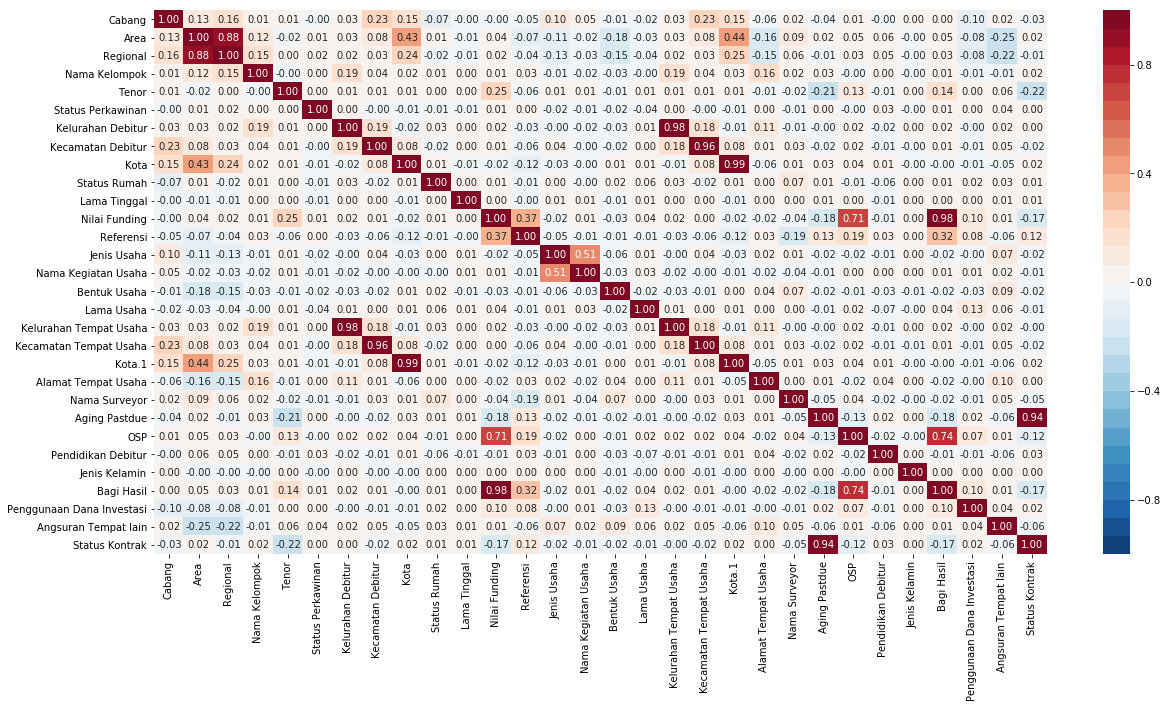

In [33]:
datacorr = data_num.corr()
plt.figure(figsize=(20,10))
sns.heatmap(datacorr, vmin=-1, vmax=1, cmap=sns.color_palette("RdBu_r", 30), annot=True, fmt='.2f')

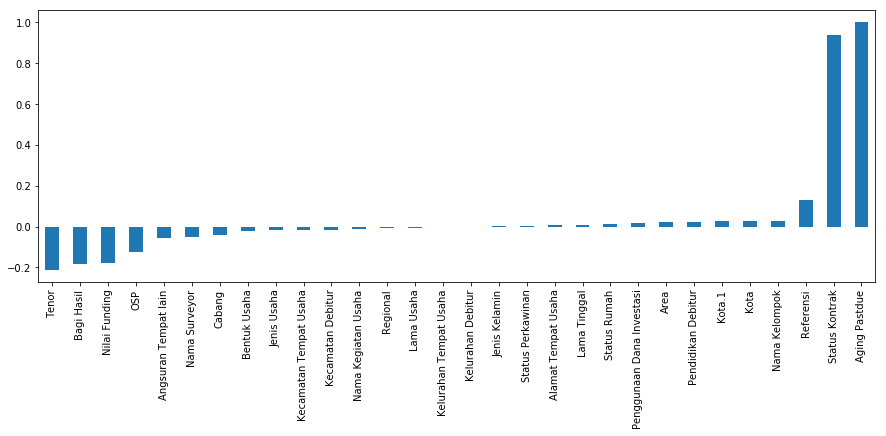

In [34]:
datacorr['Aging Pastdue'].sort_values().plot(kind='bar', figsize=(15,5))

In [35]:
X = data_num.drop(columns='Aging Pastdue')
y = data_num['Aging Pastdue']

In [36]:
rf = RandomForestRegressor(n_estimators=20, max_depth=8)
kf = KFold(n_splits=5, random_state=123)
rf_pred = cross_val_predict(rf, X, y, cv=kf)
print('R2:', r2_score(y, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, rf_pred)))

R2: 0.8763354095624614
RMSE: 25.244063436056535


Text(0, 0.5, 'Predicted')

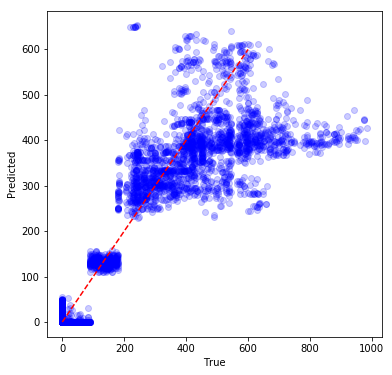

In [37]:
plt.figure(figsize=(6,6))
plt.plot(y, rf_pred, 'bo', alpha=0.2)
plt.plot([0, 600], [0, 600], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')

In [38]:
gb = GradientBoostingRegressor(n_estimators=20, max_depth=8)
kf = KFold(n_splits=5, random_state=123)
gb_pred = cross_val_predict(gb, X, y, cv=kf)
print('R2:', r2_score(y, gb_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, gb_pred)))

R2: 0.8156392844975588
RMSE: 30.822706692017338


Text(0, 0.5, 'Predicted')

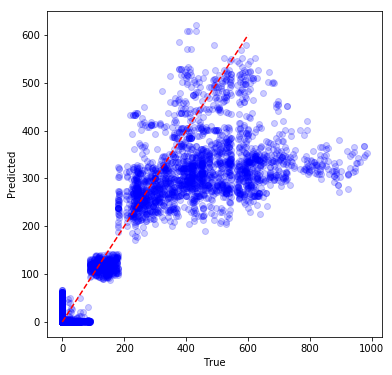

In [39]:
plt.figure(figsize=(6,6))
plt.plot(y, gb_pred, 'bo', alpha=0.2)
plt.plot([0, 600], [0, 600], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')

In [40]:
lr = LinearRegression()
kf = KFold(n_splits=5, random_state=123)
lr_pred = cross_val_predict(lr, X, y, cv=kf)
print('R2:', r2_score(y, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, lr_pred)))

R2: 0.8303250172211738
RMSE: 29.56960260778028


In [41]:
br = BayesianRidge()
kf = KFold (n_splits=5, random_state=123)
br_pred = cross_val_predict(br, X, y, cv=kf)
print('R2:', r2_score(y, br_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, br_pred)))

R2: 0.8303212146659917
RMSE: 29.569933945417166
